# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [92]:
pip install --upgrade plotly


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [93]:
pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [95]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [96]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [97]:
df_hh_income.head()

Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667

In [98]:
df_pct_poverty.head()

Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42

In [99]:
df_pct_completed_hs.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [100]:
df_share_race_city.head()

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [101]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [102]:
df_pct_poverty = df_pct_poverty.dropna()

In [103]:
df_fatalities = df_fatalities.dropna()

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [104]:
fig = px.bar(df_pct_poverty, x='Geographic Area', y='poverty_rate', title='Pct of poverty rate per city', color='Geographic Area')

fig.show()

In [105]:
df_pct_poverty.shape

(29329, 3)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [106]:
df_pct_completed_hs.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [107]:
fig = px.bar(df_pct_completed_hs, x='Geographic Area', y='percent_completed_hs', 
             title='High School Completion by State',
             template='plotly_dark')
fig.update_traces(marker_color='#636EFA', marker_line_color='#636EFA', marker_line_width=0)
fig.show()

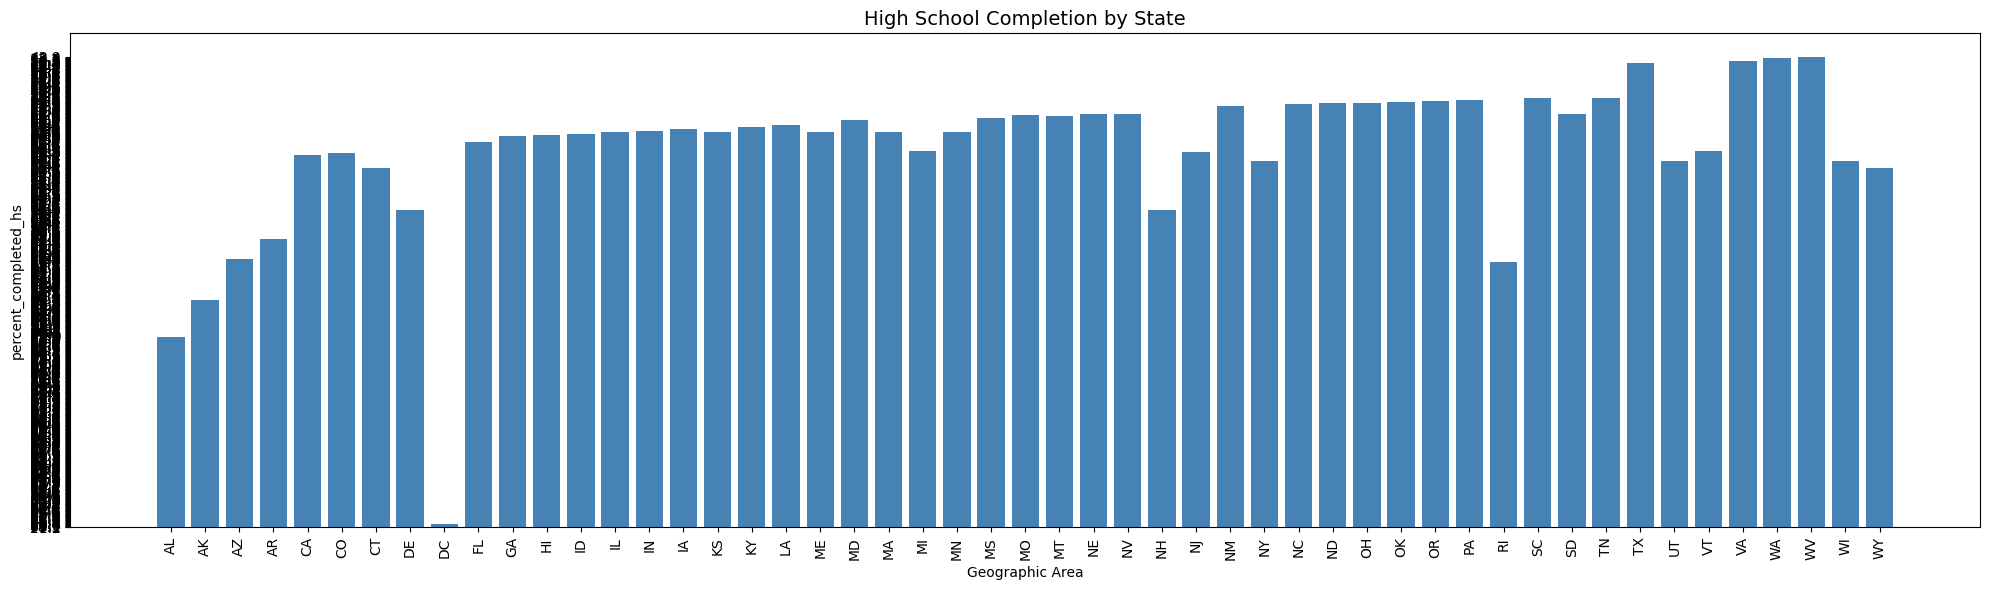

In [108]:
# Alternative with matplotlib if Plotly colors are still washed out
plt.figure(figsize=(20, 6))
plt.bar(df_pct_completed_hs['Geographic Area'], df_pct_completed_hs['percent_completed_hs'], color='steelblue')
plt.title('High School Completion by State', fontsize=14)
plt.xlabel('Geographic Area')
plt.ylabel('percent_completed_hs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [109]:
df_pct_poverty.head(50)

Geographic Area                 City poverty_rate
0               AL           Abanda CDP         78.8
1               AL       Abbeville city         29.1
2               AL      Adamsville city         25.5
3               AL         Addison town         30.7
4               AL           Akron town           42
5               AL       Alabaster city         11.2
6               AL     Albertville city         26.7
7               AL  Alexander City city         30.4
8               AL       Alexandria CDP          9.7
9               AL      Aliceville city         41.3
10              AL         Allgood town         27.7
11              AL         Altoona town         27.5
12              AL       Andalusia city         24.5
13              AL        Anderson town         13.8
14              AL        Anniston city         31.7
15              AL            Arab city         16.7
16              AL         Ardmore town         19.1
17              AL            Argo town          8.6
18              AL          Ariton town         37.6
19              AL           Arley town         31.6
20              AL         Ashford town         18.8
21              AL         Ashland town         22.4
22              AL        Ashville city         28.3
23              AL          Athens city           13
24              AL          Atmore city         24.7
25              AL         Attalla city         20.3
26              AL          Auburn city         31.8
27              AL    Autaugaville town         24.1
28              AL            Avon town         22.2
29              AL             Axis CDP          6.8
30              AL          Babbie town         15.7
31              AL       Baileyton town         28.6
32              AL       Bakerhill town         19.1
33              AL         Ballplay CDP          7.1
34              AL           Banks town         38.2
35              AL     Bay Minette city         26.3
36              AL  Bayou La Batre city         30.1
37              AL      Bear Creek town         25.3
38              AL        Beatrice town         44.9
39              AL       Beaverton town          8.1
40              AL         Belgreen CDP         28.8
41              AL            Belk town         39.1
42              AL          Bellamy CDP         42.9
43              AL   Belle Fontaine CDP         36.7
44              AL          Benton town            0
45              AL           Berry town         30.9
46              AL        Bessemer city         32.9
47              AL     Billingsley town         20.5
48              AL      Birmingham city         30.9
49              AL           Black town         12.7

In [110]:
df_pct_completed_hs.head(1)

Geographic Area        City percent_completed_hs
0              AL  Abanda CDP                 21.2

In [111]:
# Replace '-' with NaN, then convert to float
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace('-', np.nan)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [112]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [113]:
avg_poverty_by_state = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

In [114]:
avg_poverty_by_state.head()

Geographic Area  poverty_rate
0              AK         19.85
1              AL         20.65
2              AR         22.96
3              AZ         25.67
4              CA         17.12

In [115]:
avg_graduate_rate_by_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

In [116]:
avg_graduate_rate_by_state.head()

Geographic Area  percent_completed_hs
0              AK                 84.63
1              AL                 80.30
2              AR                 79.95
3              AZ                 80.47
4              CA                 81.96

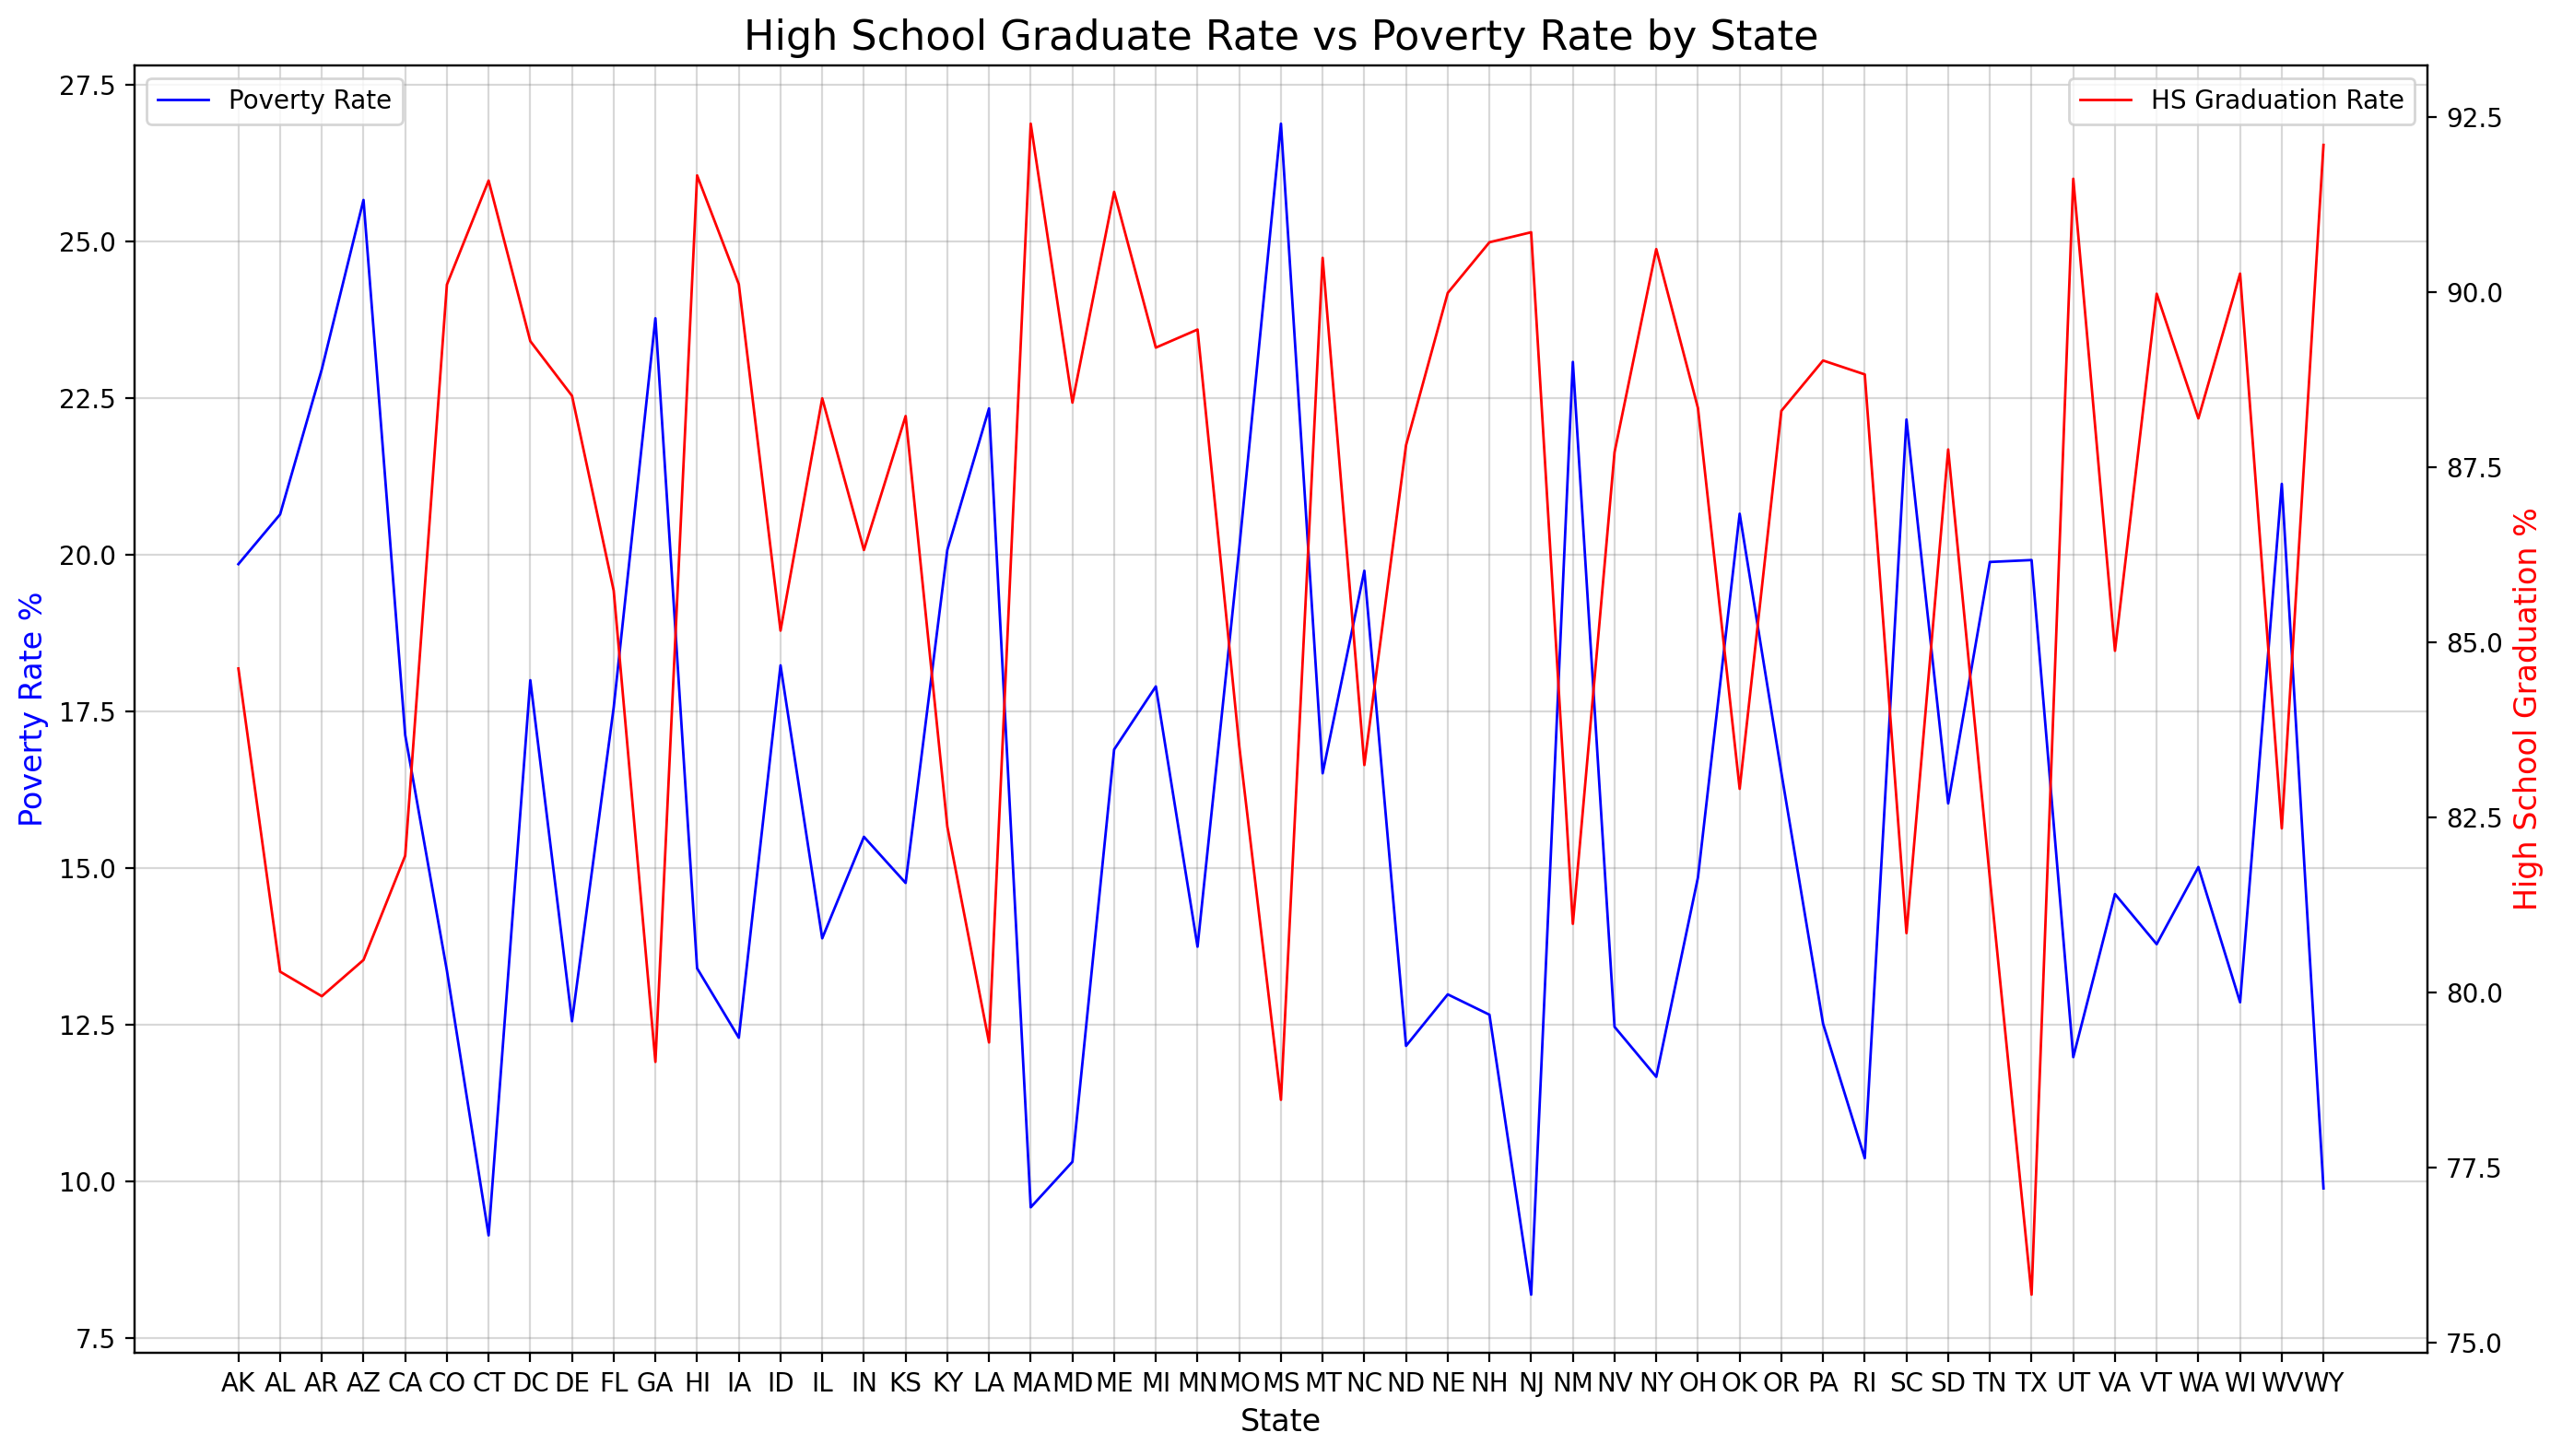

In [117]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('High School Graduate Rate vs Poverty Rate by State', fontsize=16)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.grid(color='grey', alpha=0.3)

ax1.plot( 
         avg_poverty_by_state['Geographic Area'],
         avg_poverty_by_state['poverty_rate'],
         color='blue',
         linewidth=1,
         label='Poverty Rate')

ax2.plot(
         avg_graduate_rate_by_state['Geographic Area'],
         avg_graduate_rate_by_state['percent_completed_hs'],
         color='red', 
         linewidth=1,
         label='HS Graduation Rate')

# Add axis labels
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Poverty Rate %', color='blue', fontsize=12)
ax2.set_ylabel('High School Graduation %', color='red', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [118]:
merged_df_poverty_high_school = avg_graduate_rate_by_state.merge(
    avg_poverty_by_state, 
    on='Geographic Area',
)

merged_df_poverty_high_school.head()

Geographic Area  percent_completed_hs  poverty_rate
0              AK                 84.63         19.85
1              AL                 80.30         20.65
2              AR                 79.95         22.96
3              AZ                 80.47         25.67
4              CA                 81.96         17.12

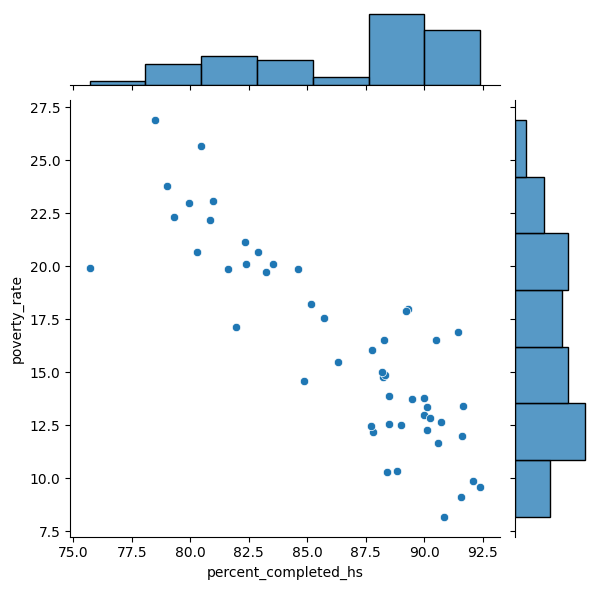

In [119]:
ax = sns.jointplot(data=merged_df_poverty_high_school, x='percent_completed_hs', y='poverty_rate' )

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

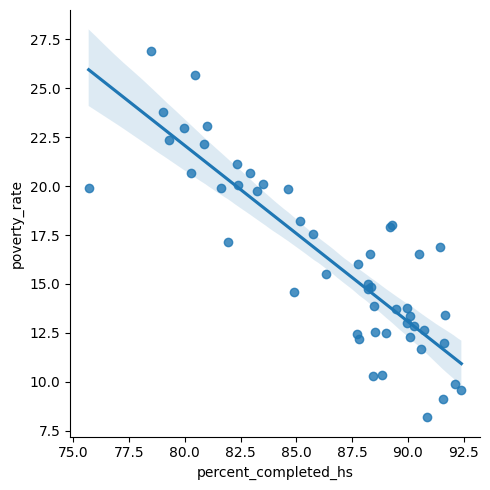

In [120]:
sns.lmplot(data=merged_df_poverty_high_school, x='percent_completed_hs', y='poverty_rate')

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

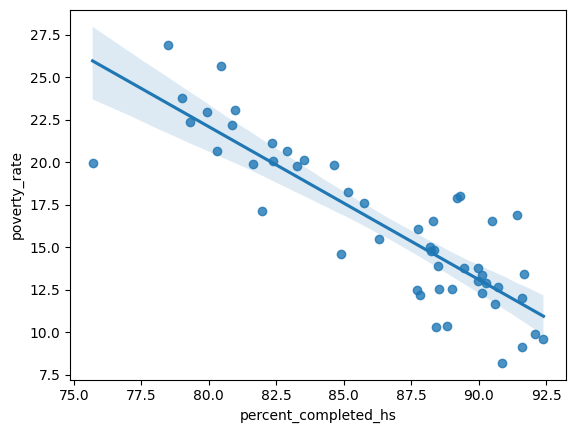

In [121]:
sns.regplot(data=merged_df_poverty_high_school, x='percent_completed_hs', y='poverty_rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [122]:
df_share_race_city.head()

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [130]:
df_share_race_city['share_white'] = df_share_race_city['share_white'].replace('(X)', np.nan)
df_share_race_city['share_white'] = df_share_race_city['share_white'].astype(float)

In [123]:
df_share_race_city['share_black'] = df_share_race_city['share_black'].replace('(X)', np.nan)
df_share_race_city['share_black'] = df_share_race_city['share_black'].astype(float)

In [124]:
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].replace('(X)', np.nan)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].astype(float)

In [125]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].replace('(X)', np.nan)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].astype(float)

In [126]:
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].replace('(X)', np.nan)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].astype(float)

In [131]:
df_share_race_city.head()

Geographic area             City  share_white  share_black  \
0              AL       Abanda CDP        67.20        30.20   
1              AL   Abbeville city        54.40        41.40   
2              AL  Adamsville city        52.30        44.90   
3              AL     Addison town        99.10         0.10   
4              AL       Akron town        13.20        86.50   

   share_native_american  share_asian  share_hispanic  
0                   0.00         0.00            1.60  
1                   0.10         1.00            3.10  
2                   0.50         0.30            2.30  
3                   0.00         0.10            0.40  
4                   0.00         0.00            0.30

In [134]:
avg_race_state = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white': "mean", 
                                                                    'share_black': "mean", 
                                                                    'share_native_american': 'mean',
                                                                    'share_asian': 'mean',
                                                                    'share_hispanic': 'mean'})

In [135]:
avg_race_state.head()

Geographic area  share_white  share_black  share_native_american  \
0              AK        45.65         0.57                  45.86   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.87         2.69                   1.72   

   share_asian  share_hispanic  
0         1.39            2.15  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.57           29.65

In [138]:
fig = px.bar(avg_race_state, 
             x='Geographic area', 
             y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
             title='Share of race per state')
fig.update_layout(
    xaxis_title = 'State', 
    yaxis_title='Percentage'
)

fig.show()



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [139]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [157]:
fatality_by_race_state = df_fatalities.groupby(['state', 'race'], as_index=False).size()

In [158]:
fatality_by_race_state.head()

state race  size
0    AK    B     1
1    AK    N     6
2    AK    W     7
3    AL    B    14
4    AL    W    31

In [165]:
fatality_by_race = df_fatalities.groupby('race', as_index=False).size()
fig = px.pie(fatality_by_race, values='size', names='race', hole=0.4)  # hole=0.4 makes it a donut
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [166]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [171]:
fatality_by_gender = df_fatalities.groupby('gender', as_index=False).size()

In [172]:
fatality_by_gender.head()

gender  size
0      F    94
1      M  2160

In [173]:
fig = px.bar(fatality_by_gender, x='gender', y='size')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [174]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [183]:
gender_manner_death = df_fatalities.groupby(['manner_of_death', 'gender'], as_index=False).size()

In [184]:
gender_manner_death.head()

manner_of_death gender  size
0              shot      F    89
1              shot      M  2011
2  shot and Tasered      F     5
3  shot and Tasered      M   149

In [185]:
fig = px.bar(gender_manner_death, x='manner_of_death', y='size', color='gender')

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [186]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [198]:
armed_stat = df_fatalities.groupby('armed', as_index=False).size()

armed_stat.head(5)

armed  size
0                    Taser     6
1          air conditioner     1
2                       ax     8
3             baseball bat     7
4  baseball bat and bottle     1

In [199]:
fig = px.bar(armed_stat, x='armed', y='size')
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [200]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [209]:
pct_under_25 = df_fatalities[df_fatalities['age'] < 25.00].count() / df_fatalities.count()
pct_under_25


id                        0.19
name                      0.19
date                      0.19
manner_of_death           0.19
armed                     0.19
age                       0.19
gender                    0.19
race                      0.19
city                      0.19
state                     0.19
signs_of_mental_illness   0.19
threat_level              0.19
flee                      0.19
body_camera               0.19
dtype: float64

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [210]:
fig = px.histogram(df_fatalities, x='age')

fig.show()

<Axes: xlabel='age', ylabel='Density'>

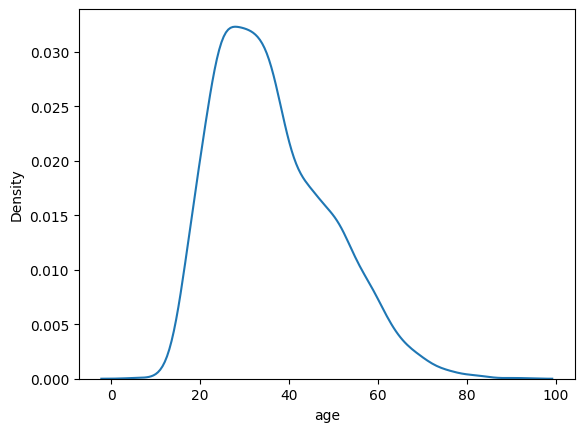

In [211]:
sns.kdeplot(data=df_fatalities, x='age')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='age', ylabel='Density'>

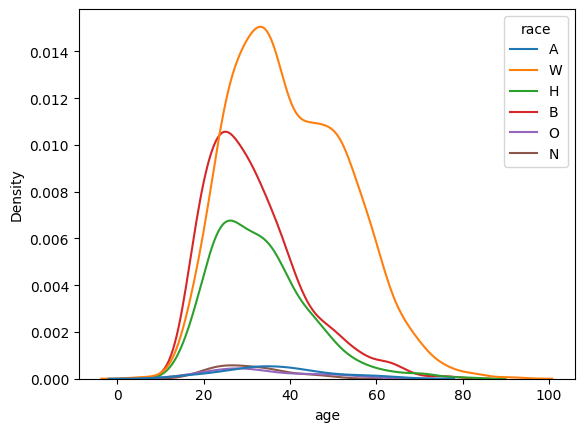

In [213]:
sns.kdeplot(df_fatalities, x='age', hue='race')

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [221]:
df_race = df_fatalities.groupby('race', as_index=False).size()

df_race.head()

race  size
0    A    36
1    B   592
2    H   401
3    N    29
4    O    28

In [222]:
fig = px.bar(df_race, x='race', y='size')

fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [223]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [225]:
mental_ill_pct = (df_fatalities[df_fatalities['signs_of_mental_illness'] == True]).count() / (df_fatalities['signs_of_mental_illness']).count()

mental_ill_pct

id                        0.25
name                      0.25
date                      0.25
manner_of_death           0.25
armed                     0.25
age                       0.25
gender                    0.25
race                      0.25
city                      0.25
state                     0.25
signs_of_mental_illness   0.25
threat_level              0.25
flee                      0.25
body_camera               0.25
dtype: float64

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [236]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [239]:
top_10_citities = df_fatalities.groupby('city', as_index=False).size().sort_values('size', ascending=False).head(10)

top_10_citities

city  size
658   Los Angeles    35
895       Phoenix    28
518       Houston    24
212       Chicago    22
57         Austin    18
619     Las Vegas    17
254      Columbus    16
1003  San Antonio    15
723         Miami    15
1095    St. Louis    14

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [245]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [251]:
race_by_city = df_fatalities.groupby(['city', 'race'], as_index=False).size()

race_by_city.head()

city race  size
0  Abbeville    B     1
1    Abilene    W     1
2   Abingdon    W     1
3    Acworth    W     1
4    Addison    H     1

In [262]:
race_by_city['race_pct'] = race_by_city['size'] / race_by_city.groupby('city')['size'].transform('sum')

In [272]:
new_df = top_10_citities.merge(
    race_by_city, 
    on='city'
)

new_df.shape

(33, 5)

In [273]:
new_df.head()

city  size_x race  size_y  race_pct
0  Los Angeles      35    A       1      0.03
1  Los Angeles      35    B      10      0.29
2  Los Angeles      35    H      18      0.51
3  Los Angeles      35    W       6      0.17
4      Phoenix      28    B       2      0.07

In [274]:
fig = px.bar(new_df, x='city', y='race_pct', color='race')
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [275]:
df_fatalities.head(1)

id        name      date manner_of_death armed   age gender race     city  \
0   3  Tim Elliot  02/01/15            shot   gun 53.00      M    A  Shelton   

  state  signs_of_mental_illness threat_level         flee  body_camera  
0    WA                     True       attack  Not fleeing        False

In [280]:
df_fatalities.groupby('state').size()

state
AK     14
AL     45
AR     20
AZ    105
CA    366
CO     63
CT      7
DC     11
DE      8
FL    136
GA     61
HI     11
IA     12
ID     14
IL     56
IN     40
KS     24
KY     40
LA     47
MA     22
MD     36
ME     10
MI     36
MN     31
MO     58
MS     22
MT     11
NC     66
ND      4
NE     14
NH      7
NJ     30
NM     41
NV     34
NY     43
OH     70
OK     65
OR     32
PA     45
RI      2
SC     41
SD      9
TN     56
TX    200
UT     22
VA     43
VT      3
WA     51
WI     42
WV     21
WY      7
dtype: int64

In [282]:
state_counts = df_fatalities.groupby('state').size().reset_index(name='count')
fig = px.choropleth(state_counts, 
                    locations='state', 
                    color='count', 
                    locationmode="USA-states", 
                    scope='usa')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [283]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).